# Linear Regression

## Importing necessary for the analysis Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

## Read the data and set the datetime as the index.

In [2]:
datafile = '02_2.CMM_Threads_Points_Analysis-Data_Science.csv'
threads = pd.read_csv(datafile)

In [3]:
# Preview the first five rows of the DataFrame.
threads.head()

,Unnamed: 0,Tip_Dim,HIT_NO,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,...,j,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D
0,0,2mm_by_30mm,2.0-30_TH-1_1_TT_CW,1,1.1,CW,720,0,7,-30.86,...,1.000000,0.0,2.544,-30.856,-16.607,-2.517,-0.004,0.007,0.001,-0.044
1,1,2mm_by_30mm,2.0-30_TH-1_2_TT_CW,1,1.1,CW,720,0,7,-30.86,...,-0.222521,0.0,2.544,-32.100,-15.071,-2.660,0.021,-0.001,0.001,-0.044
2,2,2mm_by_30mm,2.0-30_TH-1_3_TT_CW,1,1.1,CW,720,0,7,-30.86,...,-0.900969,0.0,2.544,-30.302,-14.168,-2.803,-0.016,-0.056,0.001,-0.044
3,3,2mm_by_30mm,2.0-30_TH-1_4_TT_CW,1,1.1,CW,720,0,7,-30.86,...,0.623490,0.0,2.544,-29.883,-16.134,-2.948,0.000,0.005,0.003,-0.044
4,4,2mm_by_30mm,2.0-30_TH-1_5_TT_CW,1,1.1,CW,720,0,7,-30.86,...,0.623490,0.0,2.544,-31.836,-16.121,-3.089,-0.001,-0.008,0.002,-0.044


## Column and row information: floats, objects and integers

In [4]:
# Memory usage, missing values, numbers of columns and presence NaN or null values
threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26098 entries, 0 to 26097
Data columns (total 30 columns):
Unnamed: 0    26098 non-null int64
Tip_Dim       26098 non-null object
HIT_NO        26098 non-null object
HOLE_ID       26098 non-null int64
TT_SCAN_TL    26098 non-null float64
DIR           26098 non-null object
ST_ANG        26098 non-null int64
END_ANG       26098 non-null int64
NUMHITS       26098 non-null int64
Feat_X        26098 non-null float64
Feat_Y        26098 non-null float64
Feat_Z        26098 non-null float64
Feat_i        26098 non-null float64
Feat_j        26098 non-null float64
Feat_k        26098 non-null float64
Theo_D        26098 non-null float64
Theo_X        26098 non-null float64
Theo_Y        26098 non-null float64
Theo_Z        26098 non-null float64
i             26098 non-null float64
j             26098 non-null float64
k             26098 non-null float64
Act_D         26098 non-null float64
Act_X         26098 non-null float64
Act_Y         26

## Features from the database

- Manufacturer    - Thread or parts manufacturer 
- CMM             - Equipment applied in data collection
- Probe           - Tool (support of the tip) of the equipment used
- Tip_Dim-s       - 3 different types of the tips: 2mm sphere diameter to 30 mm length w 5 mm extention, 1.5mm sphere diameter to 20 mm length w 35 mm extention, and 1.5mm sphere diameter to 30 mm length w 20 mm extention
- Software        - Software (CAD++ & Visual Basic languages) package used in the equipment
- HIT#            - Collected points' details: used tip, threaded hole number, collection method, & travel direction 
- HOLE#_ISO_mm    - Imperial or ISO standardized thread
- TT_SCAN_TL      - Touch trigger (1.1), scanning (2.2) or thread locator (3.3) methods for point collection
- DIR             - Clockwise (CW) ot counter-clockwise (CCW)
- ST_ANG          - Tip approaching angle, 720 and 360 degrees
- END_ANG         - Tip's final angle, 0 and -360 degrees
- NUMHITS         - Quantity of points within point collection method, points per feature or points per mm: 7, 10, 20, 50, and 100 
- DEPTH           - Depth of the thread where tips starts to approach data/point collection
- PITCH           - Thread pitch, 0.5 mm
- OUTER/INNER     - Interla or external thread/hole type
- ALGOR           - Algorithms for motion accuracy estimation, Least Squares (LSM) and Maximum Inscribed Circle (MIC)
- Theo_X          - Theoretical value of the X axis taken from the CAD (3D) model imported into the software
- Theo_Y          - Theoretical value of the Y axis taken from the CAD (3D) model imported into the software
- Theo_Z          - Theoretical value of the Z axis taken from the CAD (3D) model imported into the software
- Theo_i          - Theoretical value of the X axis' unit vector - i
- Theo_j          - Theoretical value of the Y axis' unit vector - j
- Theo_k          - Theoretical value of the Z axis' unit vector - k
- Theo_D          - Theoretical value of the thread/hole diameter, D
- Act_X           - Actual value of the X axis on the physical/manufactured part/feature
- Act_Y           - Actual value of the Y axis on the physical/manufactured part/feature
- Act_Z           - Actual value of the Z axis on the physical/manufactured part/feature
- Act_i           - Actual value of the X axis' unit vector - i
- Act_j           - Actual value of the Y axis' unit vector - j
- Act_k           - Actual value of the Z axis' unit vector - k
- Act_D           - Actual value of the thread/hole diameter, D
- Tar_X           - Target value of the X axis where on physical part machine starts seeking for the feature/part boundary 
- Tar_Y           - Target value of the Y axis where on physical part machine starts seeking for the feature/part boundary
- Tar_Z           - Target value of the Z axis where on physical part machine starts seeking for the feature/part boundary
- Dev_X           - Deviation/difference value of the X axes' between theoretical and actual values
- Dev_Y           - Deviation/difference value of the Y axes' between theoretical and actual values
- Dev_Z           - Deviation/difference value of the Z axes' between theoretical and actual values
- Dev_D           - Deviation/difference value of the D diameter between theoretical and actual values

## Use the .rename() method to rename necessary columans 

In [5]:
rename_dict = {'Tip_Dim-s': 'Tip_Dim', 'HIT#': 'HIT_NO', 'HOLE#_ISO_mm':'HOLE_ID', 'TOUCH_TRIGGER/SCAN': "TT_SCAN_TL"}   # key→old name, value→new name
threads.columns = [rename_dict.get(x, x) for x in threads.columns]
threads.head()

,Unnamed: 0,Tip_Dim,HIT_NO,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,...,j,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D
0,0,2mm_by_30mm,2.0-30_TH-1_1_TT_CW,1,1.1,CW,720,0,7,-30.86,...,1.000000,0.0,2.544,-30.856,-16.607,-2.517,-0.004,0.007,0.001,-0.044
1,1,2mm_by_30mm,2.0-30_TH-1_2_TT_CW,1,1.1,CW,720,0,7,-30.86,...,-0.222521,0.0,2.544,-32.100,-15.071,-2.660,0.021,-0.001,0.001,-0.044
2,2,2mm_by_30mm,2.0-30_TH-1_3_TT_CW,1,1.1,CW,720,0,7,-30.86,...,-0.900969,0.0,2.544,-30.302,-14.168,-2.803,-0.016,-0.056,0.001,-0.044
3,3,2mm_by_30mm,2.0-30_TH-1_4_TT_CW,1,1.1,CW,720,0,7,-30.86,...,0.623490,0.0,2.544,-29.883,-16.134,-2.948,0.000,0.005,0.003,-0.044
4,4,2mm_by_30mm,2.0-30_TH-1_5_TT_CW,1,1.1,CW,720,0,7,-30.86,...,0.623490,0.0,2.544,-31.836,-16.121,-3.089,-0.001,-0.008,0.002,-0.044


## Use the .rename() method to rename necessary columns 

In [6]:
threads['Tip_Dim'].replace('2mm_by_30mm', 1, inplace=True)
threads['Tip_Dim'].replace('1.5mm_by_20mm', 2, inplace=True)
threads['Tip_Dim'].replace('1.5mm_by_30mm', 3, inplace=True)

threads['TT_SCAN_TL'].replace(1.1, 1, inplace=True)
threads['TT_SCAN_TL'].replace(2.1, 2, inplace=True)
threads['TT_SCAN_TL'].replace(3.1, 3, inplace=True)

threads['DIR'].replace('CW', 1, inplace=True)
threads['DIR'].replace('CCW', 0, inplace=True)

# Let's check now how the dataframe looks like:
threads

,Unnamed: 0,Tip_Dim,HIT_NO,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,...,j,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D
0,0,1,2.0-30_TH-1_1_TT_CW,1,1.0,1,720,0,7,-30.86,...,1.000000,0.0,2.544,-30.856,-16.607,-2.517,-0.004,0.007,0.001,-0.044
1,1,1,2.0-30_TH-1_2_TT_CW,1,1.0,1,720,0,7,-30.86,...,-0.222521,0.0,2.544,-32.100,-15.071,-2.660,0.021,-0.001,0.001,-0.044
2,2,1,2.0-30_TH-1_3_TT_CW,1,1.0,1,720,0,7,-30.86,...,-0.900969,0.0,2.544,-30.302,-14.168,-2.803,-0.016,-0.056,0.001,-0.044
3,3,1,2.0-30_TH-1_4_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.623490,0.0,2.544,-29.883,-16.134,-2.948,0.000,0.005,0.003,-0.044
4,4,1,2.0-30_TH-1_5_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.623490,0.0,2.544,-31.836,-16.121,-3.089,-0.001,-0.008,0.002,-0.044
5,5,1,2.0-30_TH-1_6_TT_CW,1,1.0,1,720,0,7,-30.86,...,-0.900969,0.0,2.544,-31.417,-14.174,-3.231,0.015,-0.050,0.001,-0.044
6,6,1,2.0-30_TH-1_7_TT_CW,1,1.0,1,720,0,7,-30.86,...,-0.222521,0.0,2.544,-29.604,-15.060,-3.374,-0.037,-0.012,0.001,-0.044
7,7,1,2.0-30_TH-1_1_SC_CW,1,2.0,1,720,0,7,-30.86,...,0.808576,0.0,2.534,-31.594,-16.355,-2.471,-0.001,-0.006,0.000,-0.034
8,8,1,2.0-30_TH-1_2_SC_CW,1,2.0,1,720,0,7,-30.86,...,0.344593,0.0,2.534,-32.040,-15.768,-2.409,0.007,-0.013,0.000,-0.034
9,9,1,2.0-30_TH-1_3_SC_CW,1,2.0,1,720,0,7,-30.86,...,-0.210633,0.0,2.534,-32.115,-15.058,-2.365,0.033,-0.029,0.000,-0.034


## Scatter plots with regressions line from Pandas

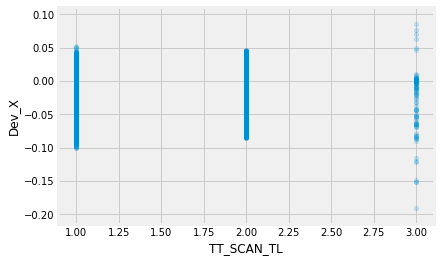

In [7]:
# Pandas scatterplot
threads.plot(kind='scatter', x='TT_SCAN_TL', y='Dev_X', alpha=0.2);

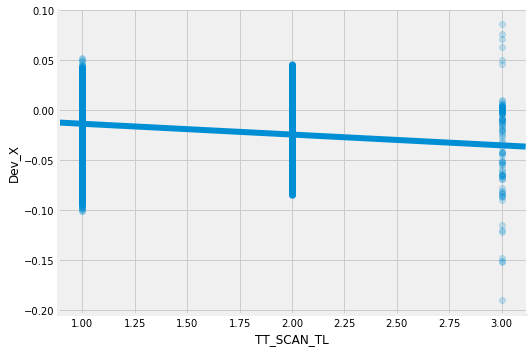

In [8]:
# Seaborn scatterplot with regression line
sns.lmplot(x='TT_SCAN_TL', y='Dev_X', data=threads, aspect=1.5, scatter_kws={'alpha':0.2});

In [9]:
# Create X and y.
feature_cols = ['TT_SCAN_TL']
X = threads[feature_cols]
y = threads.Dev_X

In [10]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [11]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [12]:
# Check X's shape (n = number of observations, p = number of features).
print((X.shape))

(26098, 1)


In [13]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print((y.shape))

(26098,)


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [16]:
# help(lr)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
np.array([0, 10, 20, 30, 100]).reshape(-1,1).shape

(5, 1)

In [19]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lr.predict(np.array([0, 10, 20, 30, 100]).reshape(-1,1))

array([-0.00261853, -0.11050523, -0.21839194, -0.32627864, -1.08148557])

In [20]:
X_new = [[0], [10]]
lr.predict(X_new)

array([-0.00261853, -0.11050523])

In [21]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

-0.0026185300885460533
[-0.01078867]


In [23]:
# Manually calculate the prediction for max allowed tolerance deviation.
0.00310483*0.13-0.0075408233041934

-0.0071371954041934

In [24]:
# Use the predict method.
linreg.predict(np.array([0.13]).reshape(-1,1))

array([-0.00402106])

In [25]:
# Create a new column for Inches - Imperial Standard.
threads['Dev_X_Inches'] = threads.Dev_X / 25.4
threads.head()

,Unnamed: 0,Tip_Dim,HIT_NO,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,...,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D,Dev_X_Inches
0,0,1,2.0-30_TH-1_1_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-30.856,-16.607,-2.517,-0.004,0.007,0.001,-0.044,-0.000157
1,1,1,2.0-30_TH-1_2_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-32.100,-15.071,-2.660,0.021,-0.001,0.001,-0.044,0.000827
2,2,1,2.0-30_TH-1_3_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-30.302,-14.168,-2.803,-0.016,-0.056,0.001,-0.044,-0.000630
3,3,1,2.0-30_TH-1_4_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-29.883,-16.134,-2.948,0.000,0.005,0.003,-0.044,0.000000
4,4,1,2.0-30_TH-1_5_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-31.836,-16.121,-3.089,-0.001,-0.008,0.002,-0.044,-0.000039


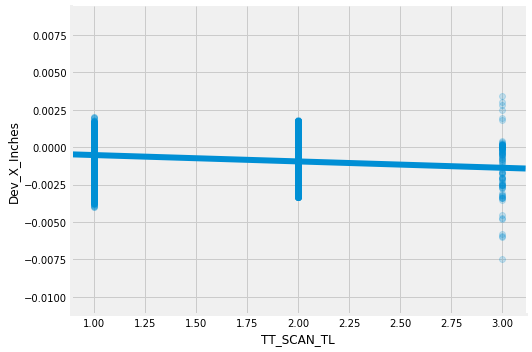

In [26]:
# Seaborn scatterplot with regression line
sns.lmplot(x='TT_SCAN_TL', y='Dev_X_Inches', data=threads, aspect=1.5, scatter_kws={'alpha':0.2});

In [27]:
# Create X and y.
feature_cols = ['TT_SCAN_TL']
X = threads[feature_cols]
y = threads.Dev_X_Inches

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

-0.00010309173576952867
[-0.00042475]


In [28]:
# Convert 0.13 mm deviation to Inches.
0.13/25.4

0.005118110236220473

In [29]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lr.predict(np.array([0.005, 10, 20, 30, 100]).reshape(-1,1))

array([-0.00267247, -0.11050523, -0.21839194, -0.32627864, -1.08148557])

In [32]:
# Create feature column variables
feature_cols = ['Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Theo_X', 'Act_X', 'i', 'Dev_D', 'Dev_X_Inches']

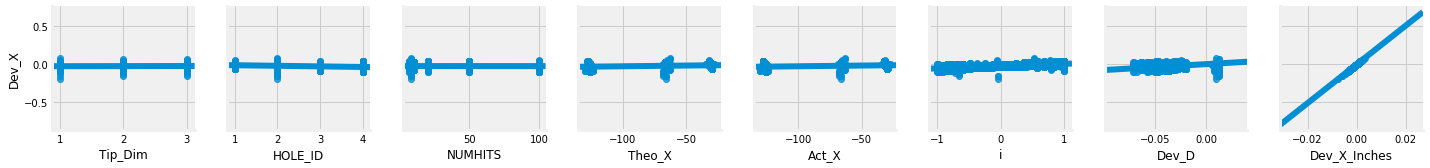

In [33]:
# multiple scatterplots in Seaborn
sns.pairplot(threads, x_vars=feature_cols, y_vars='Dev_X', kind='reg');

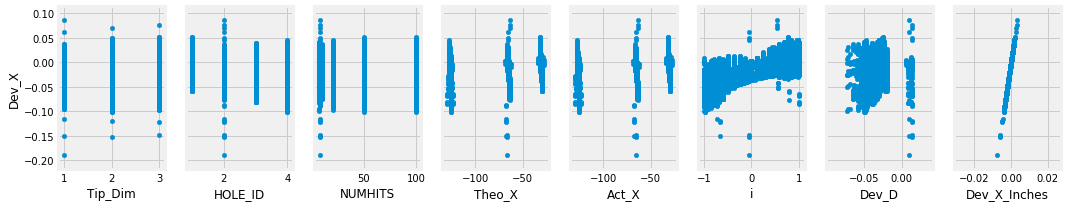

In [34]:
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    threads.plot(kind='scatter', x=feature, y='Dev_X', ax=axs[index], figsize=(16, 3))

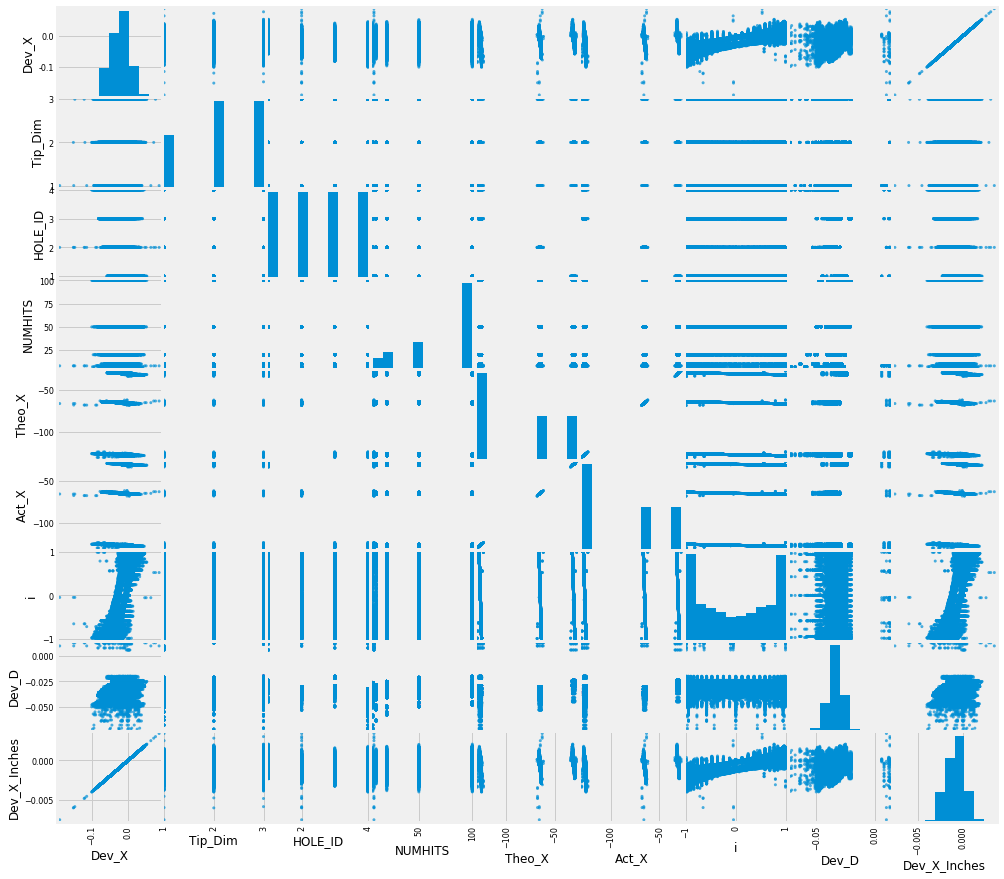

In [35]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of *every* column

grr = pd.plotting.scatter_matrix(threads[['Dev_X'] + feature_cols], figsize=(15, 15), alpha=0.7)

In [36]:
# Cross-tabulation of tip dimensions and deviation on X axis
pd.crosstab(threads.Tip_Dim, threads.Dev_X)

Dev_X,-0.18999999999999773,-0.15200000000000102,-0.15099999999999625,-0.14799999999999613,-0.12199999999998568,-0.11999999999999035,-0.11499999999999487,-0.1010000000000133,-0.09900000000001796,-0.09900000000000377,...,0.04599999999999227,0.045999999999999375,0.04899999999999949,0.049999999999997165,0.05100000000000193,0.0519999999999996,0.06299999999998818,0.07099999999999795,0.0759999999999934,0.08599999999999852
Tip_Dim,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,2,1,1,...,1,2,2,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,1,1,0,0,1,0


In [37]:
# Correlation matrix (ranges from 1 to -1)
threads.corr()

,Unnamed: 0,Tip_Dim,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,Feat_Y,...,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D,Dev_X_Inches
Unnamed: 0,1.000000,0.933266,0.337011,0.091126,-0.033199,-0.264941,-0.266709,0.078132,-0.319432,-0.319704,...,-0.001931,0.001199,-0.319341,-0.319634,0.025370,-0.084425,-0.293181,-0.011905,-0.104047,-0.084425
Tip_Dim,0.933266,1.000000,-0.000070,0.084655,0.003233,0.003196,-0.001077,0.004970,0.000089,0.000080,...,-0.002159,-0.012810,0.000081,0.000136,0.012210,0.034399,-0.115964,-0.018098,0.033389,0.034399
HOLE_ID,0.337011,-0.000070,1.000000,0.000361,-0.000522,-0.720032,-0.723143,0.000022,-0.947900,-0.948667,...,-0.005011,0.013612,-0.947645,-0.948609,-0.000181,-0.334264,-0.542541,-0.015813,-0.482946,-0.334264
TT_SCAN_TL,0.091126,0.084655,0.000361,1.000000,0.030392,-0.037834,0.029591,0.034331,-0.000175,-0.000185,...,0.034041,0.182358,-0.000103,-0.000055,0.433699,-0.161868,-0.225372,0.083326,0.165946,-0.161868
DIR,-0.033199,0.003233,-0.000522,0.030392,1.000000,-0.029634,-0.054085,-0.025278,0.000535,0.000527,...,-0.012251,-0.063322,0.000581,0.000511,-0.048719,-0.002698,-0.033549,0.090524,-0.141252,-0.002698
ST_ANG,-0.264941,0.003196,-0.720032,-0.037834,-0.029634,1.000000,0.933521,-0.302783,0.769303,0.757537,...,-0.035646,-0.198588,0.769186,0.757528,-0.182924,0.211451,0.416360,0.005841,0.095980,0.211451
END_ANG,-0.266709,-0.001077,-0.723143,0.029591,-0.054085,0.933521,1.000000,-0.346292,0.772616,0.760800,...,0.031463,0.165880,0.772390,0.760752,0.161097,0.205040,0.438603,-0.027860,0.247799,0.205040
NUMHITS,0.078132,0.004970,0.000022,0.034331,-0.025278,-0.302783,-0.346292,1.000000,-0.000118,-0.000080,...,-0.021259,-0.119991,-0.000088,-0.000096,-0.094918,-0.005964,-0.015475,0.044607,0.112183,-0.005964
Feat_X,-0.319432,0.000089,-0.947900,-0.000175,0.000535,0.769303,0.772616,-0.000118,1.000000,0.899172,...,0.006032,-0.011279,0.999750,0.899116,0.000219,0.320886,0.516373,0.012179,0.399639,0.320886
Feat_Y,-0.319704,0.000080,-0.948667,-0.000185,0.000527,0.757537,0.760800,-0.000080,0.899172,1.000000,...,0.010524,-0.009674,0.898949,0.999943,0.000241,0.269444,0.561991,0.003965,0.342923,0.269444


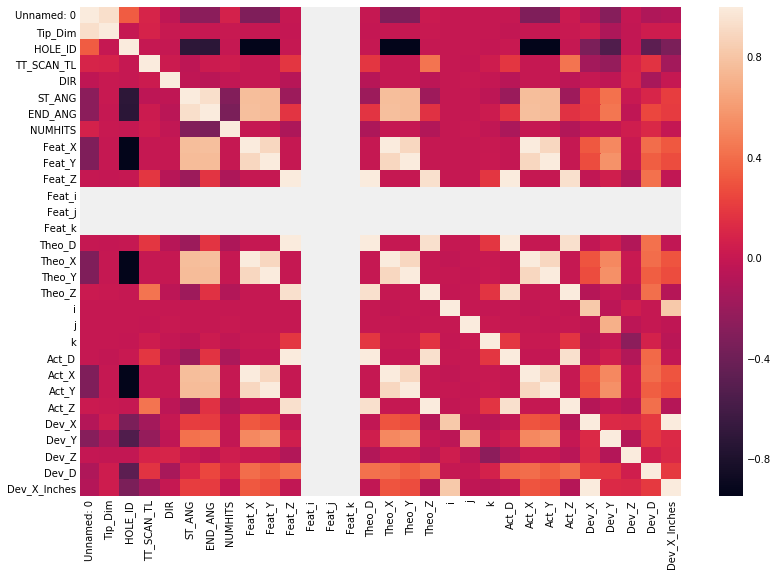

In [38]:
# Visualize correlation matrix in Seaborn using a heat map.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

sns.heatmap(threads.corr())

In [43]:
# Create feature column variables
feature_cols = ['Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Act_X', 'Act_Y', 'Act_Z', 'i', 'j', 'Theo_D', 'Dev_Y', 'Dev_Z', 'Dev_D']

In [44]:
# Create X and y.
X = threads[feature_cols]
y = threads.Dev_X


# Instantiate and fit.
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

0.0
[ 1.65801058e-03 -1.49467358e-02 -1.87492239e-05  3.99141335e-05
 -1.59715017e-04 -2.13645280e-03  2.97192707e-02 -5.97027614e-03
  4.04059167e-03  1.70571249e-01  9.93577392e-01  2.02546151e-01]


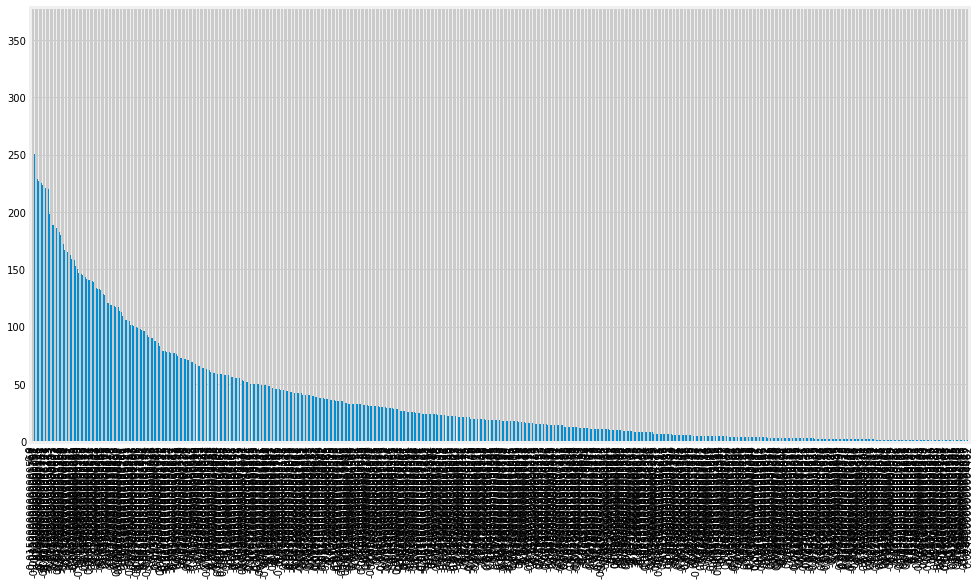

In [45]:
y.value_counts().plot(kind='bar', figsize=(15,8))

In [46]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

[('Tip_Dim', 1.0632926528694333e-16),
 ('HOLE_ID', -2.897684798923763e-15),
 ('NUMHITS', -1.8367900221095567e-17),
 ('Tar_X', 6.926916288616558e-14),
 ('Act_X', -6.934863072611887e-14),
 ('Tar_Y', -1.3308301829448638e-14),
 ('Act_Y', 1.3311829676507635e-14),
 ('Tar_Z', -3.8155449448514924e-14),
 ('Act_Z', 3.816116123280098e-14),
 ('Theo_i', -1.3530843112619095e-15),
 ('Act_i', 1.1718068721953709e-15),
 ('Theo_j', 1.7763568394002505e-15),
 ('Act_j', 2.0473361987413016e-16),
 ('Theo_D', 4.183896285956767e-16),
 ('Dev_D', 1.2213844119141776e-15),
 ('Dev_X_Inches', 25.399999999999995)]

              TT_SCAN_TL   Tip_Dim   HOLE_ID   NUMHITS     Act_X     Act_Y  \
TT_SCAN_TL      1.000000  0.084655  0.000361  0.034331 -0.000103 -0.000055   
Tip_Dim         0.084655  1.000000 -0.000070  0.004970  0.000081  0.000136   
HOLE_ID         0.000361 -0.000070  1.000000  0.000022 -0.947645 -0.948609   
NUMHITS         0.034331  0.004970  0.000022  1.000000 -0.000088 -0.000096   
Act_X          -0.000103  0.000081 -0.947645 -0.000088  1.000000  0.898892   
Act_Y          -0.000055  0.000136 -0.948609 -0.000096  0.898892  1.000000   
Act_Z           0.433699  0.012210 -0.000181 -0.094918  0.000158  0.000168   
k               0.034041 -0.002159 -0.005011 -0.021259  0.005192  0.010780   
i              -0.002083 -0.000411 -0.000244  0.000942 -0.021571  0.000808   
j              -0.007391 -0.001590  0.001022  0.003351 -0.000810 -0.011472   
Theo_D          0.184946 -0.011732 -0.000050 -0.115501 -0.000273 -0.000079   
Act_D           0.182358 -0.012810  0.013612 -0.119991 -0.011574

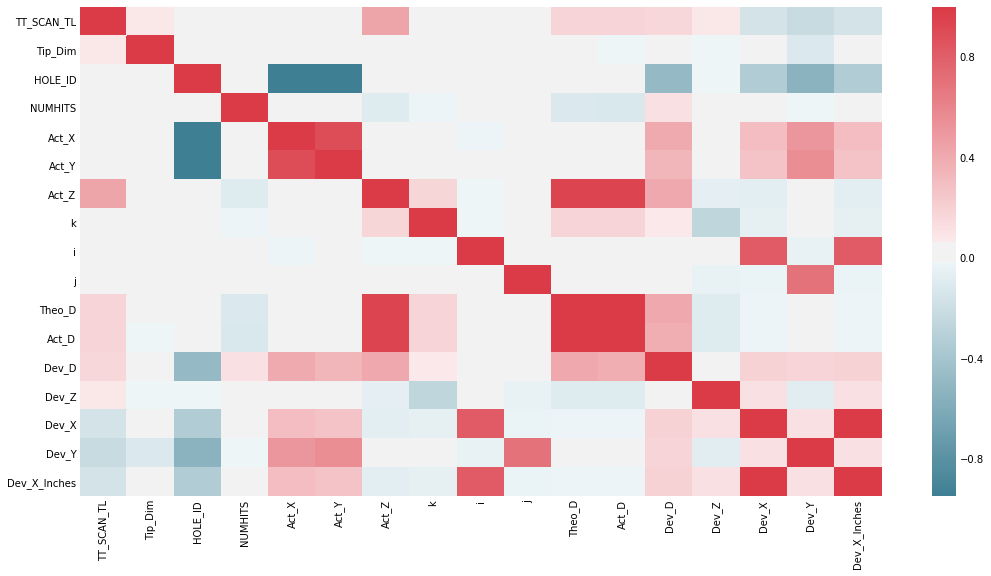

In [59]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = threads[['TT_SCAN_TL', 'Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Act_X', 'Act_Y', 'Act_Z', 'k', 'i', 'j', 'Theo_D', 'Act_D', 'Dev_D','Dev_Z', 'Dev_X', 'Dev_Y', 'Dev_X_Inches']].corr()
print(correlations)
plt.figure(figsize=(16, 9))
print(sns.heatmap(correlations, cmap=cmap))

In [63]:
# Create a list of features based on the above given correlation heatmap:
feature_cols = ['Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Act_X', 'Act_Z', 'Dev_X', 'Act_D', 'Dev_D']

In [64]:
# Create X and y.
X = threads[feature_cols]
y = threads.Dev_X

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print("Intercept value = ", linreg.intercept_)
print("Coefficient value = ", linreg.coef_)

Intercept value =  -8.951173136040325e-16
Coefficient value =  [ 9.82796644e-18  9.53076608e-19  7.05519768e-18 -5.84822518e-19
 -2.82216993e-17  1.00000000e+00  8.25569965e-17  2.09065879e-16]


In [65]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

[('Tip_Dim', 9.827966441763931e-18),
 ('HOLE_ID', 9.530766084316315e-19),
 ('NUMHITS', 7.055197684195453e-18),
 ('Act_X', -5.848225177787223e-19),
 ('Act_Z', -2.8221699295728016e-17),
 ('Dev_X', 0.9999999999999982),
 ('Act_D', 8.255699652843632e-17),
 ('Dev_D', 2.0906587943677608e-16)]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = threads[feature_cols]
    y = threads.Dev_X
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [70]:
# Compare different sets of features.
print("Train_Test_RMSE for 16 features = ", train_test_rmse(threads, ['Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Act_X', 'Act_Y', 'Act_Z', 'i', 'j', 'k', 'Theo_D', 'Dev_D', 'Dev_X_Inches']))
print("Train_Test_RMSE for 4 features = ", train_test_rmse(threads, ['i','j', 'k', 'Act_D', 'Dev_D', 'Act_X', 'Act_Y']))
print("Train_Test_RMSE for 5 features = ", train_test_rmse(threads, ['Tip_Dim', 'HOLE_ID', 'NUMHITS', 'Act_X', 'Act_Z', 'Dev_X', 'Act_D', 'Dev_D']))

Train_Test_RMSE for 16 features =  2.3889298331950557e-16
Train_Test_RMSE for 4 features =  0.011780060635562677
Train_Test_RMSE for 5 features =  4.180699701131362e-16


In [71]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([-0.02217287, -0.02217287, -0.02217287, ..., -0.02217287,
       -0.02217287, -0.02217287])

In [72]:
# Compute null MSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.025549846101374875

In [97]:
feature_cols = ['i', 'k', 'Dev_D']

X = threads[feature_cols]
y = threads.Dev_X

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [99]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print("Prediction with fitted model =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Prediction with fitted model = 0.013607487258797773


In [100]:
# Coefficients for a non-regularized linear regression
print(list(zip(feature_cols, ridgereg.coef_)))

[('i', 0.02943077173152727), ('k', -2.8568539255135823), ('Dev_D', 0.8002117944803341)]


In [101]:
# Try alpha=[1e-15, 1e-10, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100].
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100]}
ridgereg = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error', cv=5)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print("MSE_Ridge =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Best alpha value for Ridge Regression=", ridgereg.best_params_)
print("Best Score value for Lasso Regression=", ridgereg.best_score_)

MSE_Ridge = 0.01360069764939809
Best alpha value for Ridge Regression= {'alpha': 0.001}
Best Score value for Lasso Regression= -0.00018395990507588515


In [102]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print("MSE_Ridge =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Alpha =", ridgereg)

MSE_Ridge = 0.013769131928963323
Alpha = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)


In [103]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-18, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1]}
lassoreg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print("MSE_Lasso=", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Best alpha value for Lasso Regression=", lassoreg.best_params_)
print("Best Score value for Lasso Regression=", lassoreg.best_score_)

C:\Users\Khurshid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6380625402823369, tolerance: 0.0010299137944884361
  positive)
C:\Users\Khurshid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8144774981203724, tolerance: 0.0010180650932243402
  positive)


MSE_Lasso= 0.013606917693022733
Best alpha value for Lasso Regression= {'alpha': 1e-08}
Best Score value for Lasso Regression= -0.00018399561128424263


In [104]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=1000, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print("MSE_Lasso =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Alpha =", lassoreg)

MSE_Lasso = 0.025545556679283557
Alpha = Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [105]:
# Examine the coefficients.
print("Examine ridgereg coefficients", list(zip(feature_cols, ridgereg.coef_)))

Examine ridgereg coefficients [('i', 0.026755635449266662), ('k', -2.5802861441215654), ('Dev_D', 0.7245953989228623)]


In [106]:
# Examine the coefficients.
list(zip(feature_cols, lassoreg.coef_))

[('i', 0.0), ('k', -0.0), ('Dev_D', 0.0)]

In [83]:
from IPython.display import FileLink, FileLinks
#Creating/writing new CSV file with the updated dataframe/database
threads.to_csv(r'02_3.CMM_Threads_Points_Analysis-Data_Science.csv')
threads

,Unnamed: 0,Tip_Dim,HIT_NO,HOLE_ID,TT_SCAN_TL,DIR,ST_ANG,END_ANG,NUMHITS,Feat_X,...,k,Act_D,Act_X,Act_Y,Act_Z,Dev_X,Dev_Y,Dev_Z,Dev_D,Dev_X_Inches
0,0,1,2.0-30_TH-1_1_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-30.856,-16.607,-2.517,-0.004,0.007,0.001,-0.044,-0.000157
1,1,1,2.0-30_TH-1_2_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-32.100,-15.071,-2.660,0.021,-0.001,0.001,-0.044,0.000827
2,2,1,2.0-30_TH-1_3_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-30.302,-14.168,-2.803,-0.016,-0.056,0.001,-0.044,-0.000630
3,3,1,2.0-30_TH-1_4_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-29.883,-16.134,-2.948,0.000,0.005,0.003,-0.044,0.000000
4,4,1,2.0-30_TH-1_5_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-31.836,-16.121,-3.089,-0.001,-0.008,0.002,-0.044,-0.000039
5,5,1,2.0-30_TH-1_6_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-31.417,-14.174,-3.231,0.015,-0.050,0.001,-0.044,0.000591
6,6,1,2.0-30_TH-1_7_TT_CW,1,1.0,1,720,0,7,-30.86,...,0.0,2.544,-29.604,-15.060,-3.374,-0.037,-0.012,0.001,-0.044,-0.001457
7,7,1,2.0-30_TH-1_1_SC_CW,1,2.0,1,720,0,7,-30.86,...,0.0,2.534,-31.594,-16.355,-2.471,-0.001,-0.006,0.000,-0.034,-0.000039
8,8,1,2.0-30_TH-1_2_SC_CW,1,2.0,1,720,0,7,-30.86,...,0.0,2.534,-32.040,-15.768,-2.409,0.007,-0.013,0.000,-0.034,0.000276
9,9,1,2.0-30_TH-1_3_SC_CW,1,2.0,1,720,0,7,-30.86,...,0.0,2.534,-32.115,-15.058,-2.365,0.033,-0.029,0.000,-0.034,0.001299
